In [1]:
from scipy import stats
import gsw
import matplotlib.pyplot as plt
from spacepy import pycdf

In [2]:
act_sal_1 = [0.2, 0.5*0.2 + 0.5*35,0.4*0.2 + 0.6*35, 35]
measured_sal_1 = [0.2, 19.6, 22.6 , 34]
T_S_1 = [14.8,18.9,19.5, 21.1]
T_1 = [15.7,18.8,20.1, 21.8]

act_sal_2 =      [0.2, 7/10*0.2 + 3/10*35 +5/8*0.2, 3/8*35, 0.5*0.2 + 17.5, 2/5*0.2 +21, 1/4*0.2 +26.25, 35]
measured_con_2 = [0.38, 17.11, 19.29, 27.1, 31.5, 38.3, 48]
T_2 =            [15.6, 19.85, 19.9, 20.9, 21.3, 22.0, 22.3]


In [3]:
calc_Sa_2 = gsw.conversions.SP_from_C(measured_con_2, T_2, 0.1)

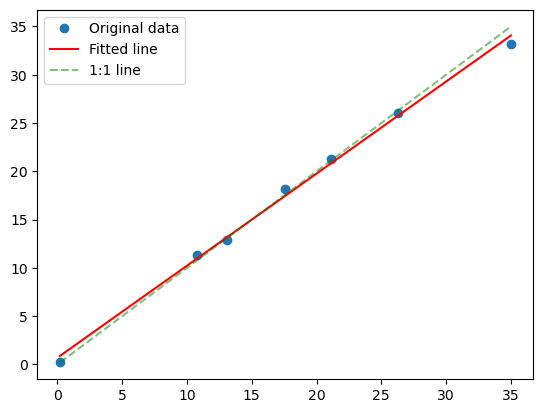

Slope:0.953565631796397 Intercept:0.690826535042472 R-squared:0.9967735318761324


In [4]:
# make a fit between act_sal_2 and calc_Sa_2
slope, intercept, r_value, p_value, std_err = stats.linregress(act_sal_2, calc_Sa_2)

# Generate the fitted values
fit_values = [slope * x + intercept for x in act_sal_2]

# Plot the original data and the fit
plt.plot(act_sal_2, calc_Sa_2, 'o', label='Original data')
plt.plot(act_sal_2, fit_values, 'r', label='Fitted line')
plt.plot(act_sal_2, act_sal_2, 'g--', label='1:1 line', alpha=0.5)
plt.legend()
plt.show()
print("Slope:" + str(slope), "Intercept:" + str(intercept), "R-squared:" + str(r_value**2))


In [5]:
def calculate_actual_salinity(T, C):
    # Calculate salinity using the gsw module
    calc_Sa = gsw.conversions.SP_from_C(C, T, 0.1)

    # Calculate the fitted salinity using the linear fit
    fitted_Sa = slope * calc_Sa + intercept

    return fitted_Sa

In [28]:
calculate_actual_salinity(20.2, 51.1)

36.39685915587755

35 Tank: 17.2 C, 46.3 mS/cm, 35.064 PSU
36 Tank: 17.4 C, 47.7 mS/cm, 36.058 PSU

In [27]:
gsw.conversions.SP_from_C(51.1, 20.2, 0.1)

37.44475621837317